### Brayton cycle for pressure ratio of 40 and a maximum operating temperature of 1200 C.

W 519281.39695094654  J/cycle
QH 795039.8546923656 J/cycle
eta (calc) 0.6531514035253974
eta (theory) 0.651447201574415


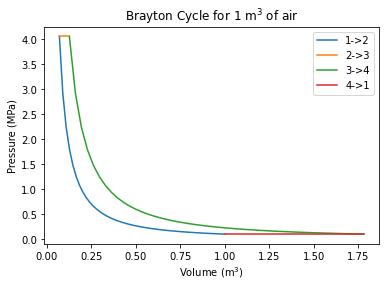

In [5]:
import numpy as np
import matplotlib.pyplot as plt

gamma = 1.4 # ratio of specific heats for air (diatomic)
R = 8.31 # J/mol/K
zabs = 273.15 # K

# Ambient air data

Tcel = 15 # C, ambient
rho_atm = 1.225  # kg/m^3 at 15 C
Patm = 101325  # Pa
mm = 0.02897 # kg/mol
nmol = rho_atm/mm   #  of moles
CP = 3.5*R  # molar heat capacity for diatomic molecule, constant pressure

# Engine data

Pratio = 40 # pressure ratio P2/P1
Tmax = 1200 # C, max the engine materials can withstand



P1 = Patm  # Pa
V1 = 1 # m^3
T1 = Tcel + zabs # K

# Adiabat

P2 = P1*Pratio
V2 = V1*(P1/P2)**(1/gamma)
T2 = T1*(V1/V2)**(gamma-1)

# Isobar

P3 = P2
T3 = Tmax + zabs
V3 = nmol*R*T3/P3

# Adiabat

P4 = P1
V4 = V3*(P3/P4)**(1/gamma)
T4 = T3*(V3/V4)**(gamma-1)

# Set up segments for plotting

V12 = np.linspace(V1,V2)
P12 = P1*(V1/V12)**gamma

V23 = np.linspace(V2,V3)
P23 = np.linspace(P2,P3)

V34 = np.linspace(V3,V4)
P34 = P3*(V3/V34)**gamma

V41 = np.linspace(V4,V1)
P41 = np.linspace(P4,P1)

W = -np.trapz(V34,P34)-np.trapz(V12,P12)   # area of cycle (J)
QH = CP*nmol*(T3-T2)              # heat in (J)
eta = W/QH                        # efficiency
eta_thy = 1-T1/T2

print('W', W, ' J/cycle')
print('QH',QH, 'J/cycle')
print('eta (calc)', eta)
print('eta (theory)', eta_thy)

plt.figure
plt.plot(V12, P12/1e6, label=("1->2"))
plt.plot(V23, P23/1e6, label=("2->3"))
plt.plot(V34, P34/1e6, label=("3->4"))
plt.plot(V41, P41/1e6, label=("4->1"))
plt.xlabel("Volume (m$^3$)")
plt.ylabel("Pressure (MPa)")
plt.title("Brayton Cycle for 1 m$^3$ of air")
plt.legend()
plt.show()

